# EDA Various classification and Esemble Method
## About the dataset
###  We will apply various classification algorithms and try to observe which one gives the best accuracy.

In [1]:
#importing a libraryes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing a datset

In [2]:
df=pd.read_csv("blood.csv")
df

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [3]:
df['Class'].value_counts()

0    570
1    178
Name: Class, dtype: int64

### Basic EDA part of dataset

In [4]:
df.head()

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [5]:
df.tail()

,Recency,Frequency,Monetary,Time,Class
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0
747,72,1,250,72,0


In [6]:
df.shape

(748, 5)

In [7]:
df.size

3740

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   Class      748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [9]:
df.describe()

,Recency,Frequency,Monetary,Time,Class
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


# handling outliers

C:\Users\91797\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Recency'>

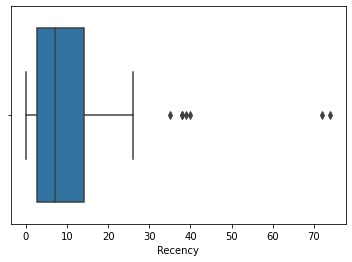

In [10]:
sns.boxplot(df['Recency'])

In [11]:
for cols in df.columns[:-1]:
    if df[cols].dtype == object:
        continue
    else:
        Q1 = df[cols].quantile(q=0.25)
        Q3 = df[cols].quantile(q=0.75)
        iqr = Q3 - Q1
    
        low = Q1 - 1.5*(Q3-Q1)
        high = Q3 + 1.5*(Q3-Q1)
        df.loc[(df[cols]<low) | (df[cols]>high),cols] = df[cols].median()

C:\Users\91797\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Recency'>

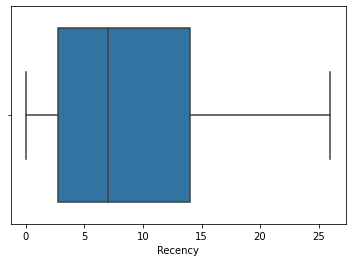

In [12]:
sns.boxplot(df['Recency'])

### Data visulaization

array([[<AxesSubplot:title={'center':'Recency'}>,
        <AxesSubplot:title={'center':'Frequency'}>],
       [<AxesSubplot:title={'center':'Monetary'}>,
        <AxesSubplot:title={'center':'Time'}>],
       [<AxesSubplot:title={'center':'Class'}>, <AxesSubplot:>]],
      dtype=object)

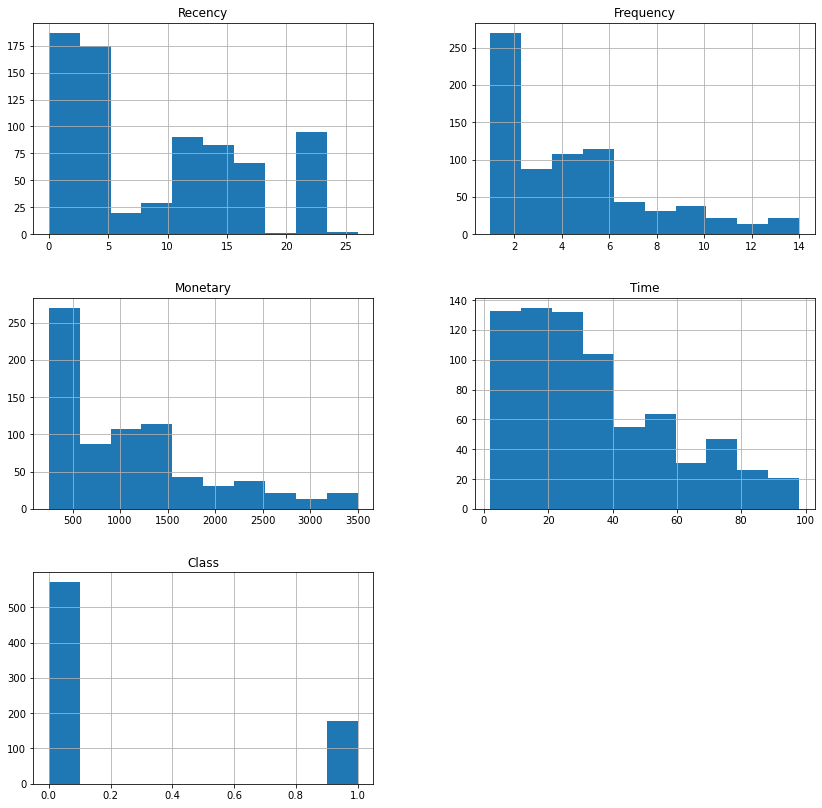

In [13]:
df.hist(figsize=(14,14))

<AxesSubplot:xlabel='Class', ylabel='Recency'>

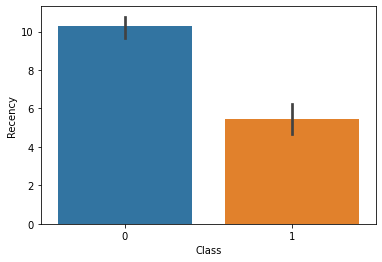

In [14]:
sns.barplot(x="Class",y="Recency",data=df)

<AxesSubplot:xlabel='Class', ylabel='Frequency'>

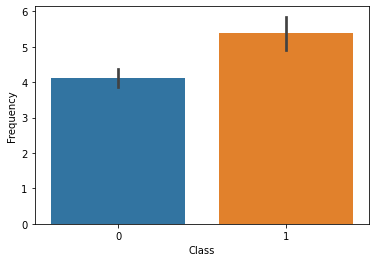

In [15]:
sns.barplot(x="Class", y="Frequency", data =df)

<AxesSubplot:xlabel='Class', ylabel='Monetary'>

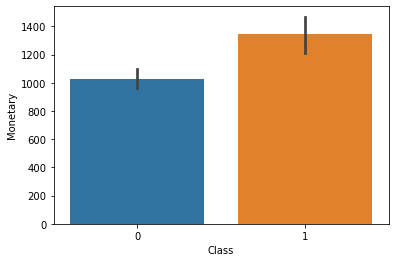

In [16]:
sns.barplot(x="Class", y="Monetary",data=df)

<AxesSubplot:xlabel='Class', ylabel='Time'>

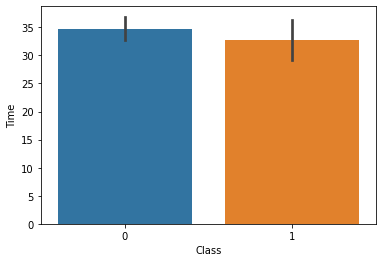

In [17]:
sns.barplot(x="Class",y="Time", data =df)

C:\Users\91797\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


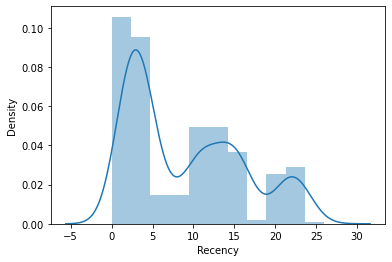

In [18]:
sns.distplot(df["Recency"]);

C:\Users\91797\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


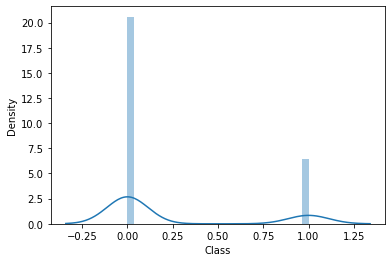

In [19]:
sns.distplot(df["Class"]);

C:\Users\91797\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Time', ylabel='Density'>

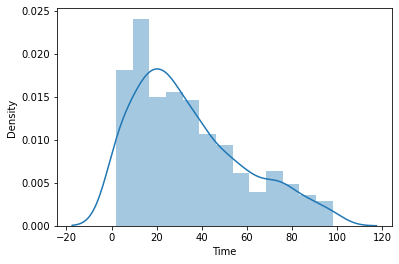

In [20]:
sns.distplot(df["Time"])

C:\Users\91797\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


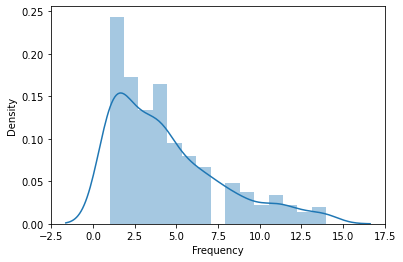

In [21]:
sns.distplot(df["Frequency"]);

C:\Users\91797\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


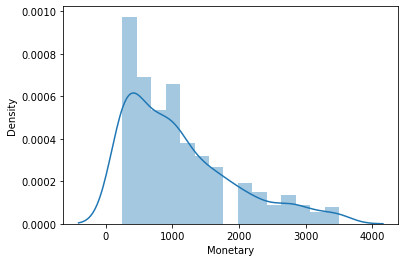

In [22]:
sns.distplot(df["Monetary"]);

In [23]:
df.corr()

,Recency,Frequency,Monetary,Time,Class
Recency,1.000000,-0.178905,-0.178905,0.134370,-0.292424
Frequency,-0.178905,1.000000,1.000000,0.532752,0.164290
Monetary,-0.178905,1.000000,1.000000,0.532752,0.164290
Time,0.134370,0.532752,0.532752,1.000000,-0.035854
Class,-0.292424,0.164290,0.164290,-0.035854,1.000000


### Corelation

<AxesSubplot:>

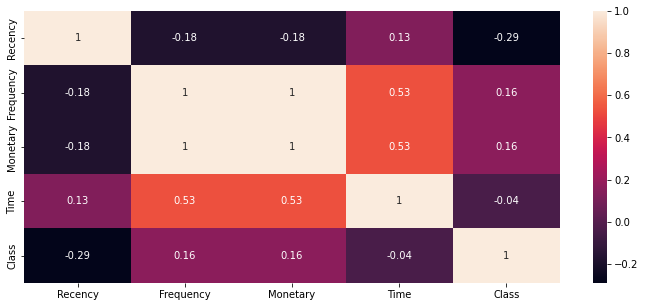

In [24]:
cor=np.round(df.corr(),2)
plt.figure(figsize=(12,5))
sns.heatmap(cor, annot =True)

### Probplot

In [25]:
from scipy.stats import probplot


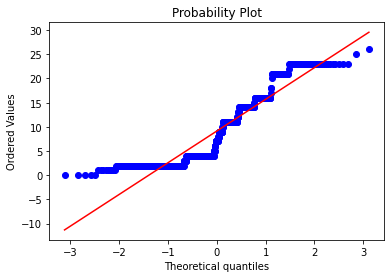

In [26]:
probplot(df["Recency"],plot=plt);

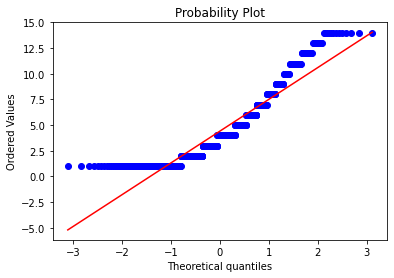

In [27]:
probplot(df["Frequency"],plot=plt);

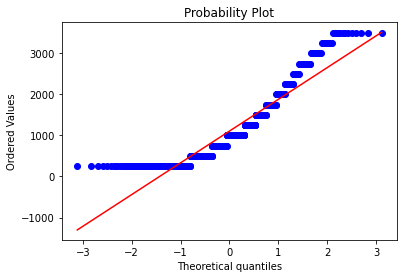

In [28]:
probplot(df["Monetary"],plot=plt);

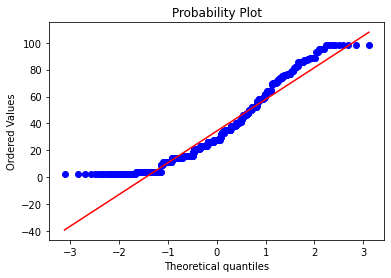

In [29]:
probplot(df["Time"],plot=plt);

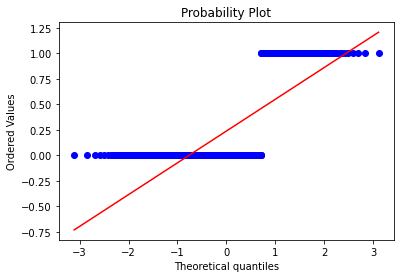

In [30]:
probplot(df["Class"],plot=plt);

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
sd=StandardScaler()

In [33]:
df1=df.drop(['Class'],axis=1)

In [34]:
std_df=sd.fit_transform(df1)

In [35]:
df2=pd.DataFrame(std_df)

In [36]:
a=df1.columns

In [37]:
df2.columns=a

In [38]:
final_df=pd.concat([df2,df['Class']],axis=1)

### Train Test And Split

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
df

,Recency,Frequency,Monetary,Time,Class
0,2,4,1000,98,1
1,0,13,3250,28,1
2,1,4,1000,35,1
3,2,4,1000,45,1
4,1,4,1000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,7,1,250,39,0


In [41]:
# Standarization

In [42]:
from sklearn.prepro

SyntaxError: invalid syntax (3225815199.py, line 1)

In [ ]:
# count class in target

# Stratified

In [ ]:
X_stratified= final_df.iloc[:,:-1]
y_stratified= final_df.iloc[:,[-1]]

In [ ]:
# count class in target
X_train,X_test,y_train,y_test= train_test_split(X_stratified,y_stratified,train_size=0.8,stratify=y_stratified,random_state=0)

### Implamanting the Algorithms.

### Logestic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logestic=LogisticRegression()

In [ ]:
model_lo=logestic.fit(X_train,y_train)
predict_lo = logestic.predict(X_test)

#### Checking for Accuracy of Logestic Regression

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [ ]:
accuracy_score(predict_lo,y_test)

In [ ]:
logestic.score(X_test,y_test)

In [ ]:
logestic.score(X_train,y_train)

In [ ]:
confusion_matrix(predict_lo,y_test)

In [ ]:
print(classification_report(predict_lo, y_test))

### Checking for number of 1's and 0's

In [ ]:
df["Class"].value_counts()


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
model_dt =dt.fit(X_train,y_train)
predict_dt=dt.predict(X_test)

#### checking for accuracy

In [ ]:
accuracy_score(predict_dt, y_test)

In [ ]:
confusion_matrix(predict_dt, y_test)

In [ ]:
print(classification_report(predict_dt, y_test))

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
model_rf = rf.fit(X_train,y_train)

predict_rf = rf.predict(X_test)

#### Checking for accuracy

In [ ]:
accuracy_score(predict_rf, y_test)

In [ ]:
confusion_matrix(predict_rf, y_test)

In [ ]:
print(classification_report(predict_rf, y_test))

### AdaBoos Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()
model_clf = clf.fit(X_train,y_train)

predict_clf = clf.predict(X_test)

### Checking for accuracy

In [ ]:
accuracy_score(predict_clf, y_test)

In [ ]:
confusion_matrix(predict_clf, y_test)

In [ ]:
print(classification_report(predict_clf, y_test))

### GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
model_gbc = gbc.fit(X_train,y_train)



predict_gbc = gbc.predict(X_test)

#### Checking for accuracy

In [ ]:
accuracy_score(predict_gbc, y_test)

In [ ]:
confusion_matrix(predict_gbc, y_test)

In [ ]:
print(classification_report(predict_gbc, y_test))

### HistGradientBoostingClassifier

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgbc = HistGradientBoostingClassifier()
model_hgbc = hgbc.fit(X_train,y_train)

predict_hgbc = hgbc.predict(X_test)

#### Checking for accuracy

In [ ]:
accuracy_score(predict_hgbc, y_test)

In [ ]:
confusion_matrix(predict_hgbc, y_test)

In [ ]:
print(classification_report(predict_hgbc, y_test))